# 1. Setup: Download and Install the Project's Package + Calculate the Metrics

## Download and Install the Project's GitHub Package + Test Data + Trained Models

In [ ]:
!rm -rf sample_data
!rm -rf facenet-main
!rm -rf main.zip
!rm -rf data.zip
!rm -rf models.zip

In [ ]:
# download the package
!wget -q --show-progress --load-cookies /tmp/cookies1.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies1.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wq_muYxtcFBywUKelyetsQrIrXmPycro' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wq_muYxtcFBywUKelyetsQrIrXmPycro" -O main.zip && rm -rf /tmp/cookies1.txt

main.zip            100%[===================>]  10.92M  67.3MB/s    in 0.2s    


In [ ]:
# extract
!unzip -o main.zip

Archive:  main.zip
5b93c8086839c1b1c255a25f2f221935fdb3041c
   creating: facenet-main/
  inflating: facenet-main/.flake8    
  inflating: facenet-main/.gitattributes  
   creating: facenet-main/.github/
   creating: facenet-main/.github/workflows/
  inflating: facenet-main/.github/workflows/pythonapp.yml  
  inflating: facenet-main/.gitignore  
  inflating: facenet-main/README.md  
   creating: facenet-main/data/
   creating: facenet-main/data/samples/
   creating: facenet-main/data/samples/fake/
 extracting: facenet-main/data/samples/fake/10_face2face.png  
 extracting: facenet-main/data/samples/fake/10_glow.png  
  inflating: facenet-main/data/samples/fake/10_pggan.png  
  inflating: facenet-main/data/samples/fake/10_stargan.jpg  
 extracting: facenet-main/data/samples/fake/10_stylegan.png  
 extracting: facenet-main/data/samples/fake/11_face2face.png  
 extracting: facenet-main/data/samples/fake/11_glow.png  
  inflating: facenet-main/data/samples/fake/11_pggan.png  
  inflating: fa

In [ ]:
# install our package (facenet)
!pip install facenet-main/

Processing ./facenet-main
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for facenet: filename=facenet-1.0.0-py3-none-any.whl size=8137 sha256=79cdc8066686dd08bda481c211140b74031ec23d898253b206400450ad0b8806
  Stored in directory: /root/.cache/pip/wheels/3d/56/7b/04537096d8c561f483eb09d0f5821d8250cc82f53b663f24ad
Successfully built facenet


In [ ]:
# download the pre-trained models.
!wget -q --show-progress --load-cookies /tmp/cookies2.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies2.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JNBOUqPkDMlaU7CclATGqh-aklagkuJa' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JNBOUqPkDMlaU7CclATGqh-aklagkuJa" -O models.zip && rm -rf /tmp/cookies2.txt

models.zip          100%[===================>] 878.27M   131MB/s    in 5.9s    


In [ ]:
# extract
!unzip -o models.zip -d facenet-main/trained

Archive:  models.zip
  inflating: facenet-main/trained/FaceCNN.pt  
  inflating: facenet-main/trained/MLP.pt  
  inflating: facenet-main/trained/SC.pt  


In [ ]:
# download data
!wget -q --show-progress --load-cookies /tmp/cookies3.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1v9TuWO5Yjz1d5hSTUsPSnZkgRBCJxF37' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1v9TuWO5Yjz1d5hSTUsPSnZkgRBCJxF37" -O data.zip && rm -rf /tmp/cookies3.txt

data.zip            100%[===================>] 175.00M   125MB/s    in 1.4s    


In [ ]:
# extract
!unzip data.zip -d facenet-main/data

Archive:  data.zip
   creating: facenet-main/data/test/
   creating: facenet-main/data/test/fake/
  inflating: facenet-main/data/test/fake/100_face2face.png  
  inflating: facenet-main/data/test/fake/100_glow.png  
  inflating: facenet-main/data/test/fake/100_pggan.png  
  inflating: facenet-main/data/test/fake/100_stargan.jpg  
  inflating: facenet-main/data/test/fake/100_stylegan.png  
  inflating: facenet-main/data/test/fake/10_face2face.png  
  inflating: facenet-main/data/test/fake/10_glow.png  
  inflating: facenet-main/data/test/fake/10_pggan.png  
  inflating: facenet-main/data/test/fake/10_stargan.jpg  
  inflating: facenet-main/data/test/fake/10_stylegan.png  
  inflating: facenet-main/data/test/fake/11_face2face.png  
  inflating: facenet-main/data/test/fake/11_glow.png  
  inflating: facenet-main/data/test/fake/11_pggan.png  
  inflating: facenet-main/data/test/fake/11_stargan.jpg  
  inflating: facenet-main/data/test/fake/11_stylegan.png  
  inflating: facenet-main/data/te

## Calculating the Metrics

In [ ]:
import os
import copy

from facenet.core import Config
from facenet.nnet.mlp import MLP
from facenet.nnet.cnn import FaceCNN
from facenet.dataio.dataset import FaceDataset
from facenet.nnet.linear_classifier import SoftmaxClassifier

import torch
import random
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
random.seed(Config.random_seed)
np.random.seed(Config.random_seed)
torch.manual_seed(Config.random_seed)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
test_dataset = FaceDataset(root_dir='facenet-main/data/test', img_dim=Config.img_dim)
test_loader = test_dataset.get_data_loader(1, False)

In [ ]:
# loading FaceCNN model
face_model = FaceCNN(label_count=FaceDataset.label_count, img_dim=Config.img_dim, base_filter=Config.base_filter)
face_model = face_model.to(device)
face_model.load_state_dict(torch.load('facenet-main/trained/FaceCNN.pt'))
face_model.eval()

# loading MLP model
mlp_model = MLP(label_count=FaceDataset.label_count, hl_size=1000,
            img_dim=Config.img_dim, img_channels=Config.img_channels)
mlp_model = mlp_model.to(device)
mlp_model.load_state_dict(torch.load('facenet-main/trained/MLP.pt'))
mlp_model.eval()

# loading SoftmaxClassifier model
sc_model = SoftmaxClassifier(label_count=FaceDataset.label_count,
                          img_dim=Config.img_dim, img_channels=Config.img_channels)
sc_model = sc_model.to(device)
sc_model.load_state_dict(torch.load('facenet-main/trained/SC.pt'))
sc_model.eval()

SoftmaxClassifier(
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=196608, out_features=2, bias=True)
  )
)

In [ ]:
sources = ['face2face', 'glow', 'pggan', 'stargan', 'stylegan', 'celeba', 'celebaHQ', 'youtube']

class Metrics:
    """Tracks predictions over each source of image.
    """
    def __init__(self):
        self.y_pred = []
        self.y_true = []

        self.total = {
            'face2face': 0,
            'glow': 0,
            'pggan': 0,
            'stargan': 0,
            'stylegan': 0,
            'celeba': 0,
            'celebaHQ': 0,
            'youtube': 0,
        }

        self.correct = {
            'face2face': 0,
            'glow': 0,
            'pggan': 0,
            'stargan': 0,
            'stylegan': 0,
            'celeba': 0,
            'celebaHQ': 0,
            'youtube': 0,
        }
    
    def plot_confusion_matrix(self):
        cf_matrix = confusion_matrix(self.y_true, self.y_pred)

        df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * FaceDataset.label_count, index=[i for i in FaceDataset.labels], columns=[i for i in FaceDataset.labels])
        plt.figure(figsize=(13, 8))
        sn.heatmap(df_cm, annot=True)

        # raw values with sklearn
        disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=FaceDataset.labels)
        disp.plot()
        plt.show()
    
    def plot_per_source(self):
        total_per_class = np.array(list(self.total.values()))
        correct_per_class = np.array(list(self.correct.values()))
        acc_per_class = np.around(100 * correct_per_class / total_per_class, 2)
        acc_total = [100] * len(sources)

        plt.figure(figsize=(13, 8))
        plt.bar(sources, acc_total, color='orange')
        plt.bar(sources, acc_per_class)
        plt.show()


    def print_metrics(self):
        print(f'accuracy: {accuracy_score(self.y_true, self.y_pred):.3f}')
        print(f'recall: {recall_score(self.y_true, self.y_pred, average="weighted"):.3f}')
        print(f'precision: {precision_score(self.y_true, self.y_pred, average="weighted"):.3f}')
        print(f'f1: {f1_score(self.y_true, self.y_pred, average="weighted"):.3f}')


In [ ]:
face_metrics = Metrics()
mlp_metrics = Metrics()
sc_metrics = Metrics()

models = [face_model, mlp_model, sc_model]
metrics = [face_metrics, mlp_metrics, sc_metrics]

In [ ]:
with torch.no_grad():
    for data in test_loader:
        images, labels, src = data[0].to(device), data[1].to(device), data[2][0]

        for model, metric in zip(models, metrics):
            out_labels = model(images)
            preds = torch.argmax(out_labels.data, dim=1)

            metric.y_pred.extend(preds.data.cpu().numpy())
            metric.y_true.extend(labels.data.cpu().numpy())
            metric.total[src] += labels.shape[0]
            metric.correct[src] += (preds == labels).sum().item()

# 2. Comparing the Models

## FaceCNN

### Metrics

In [ ]:
face_metrics.print_metrics()

accuracy: 0.938
recall: 0.938
precision: 0.941
f1: 0.938


### Confusion Matrix

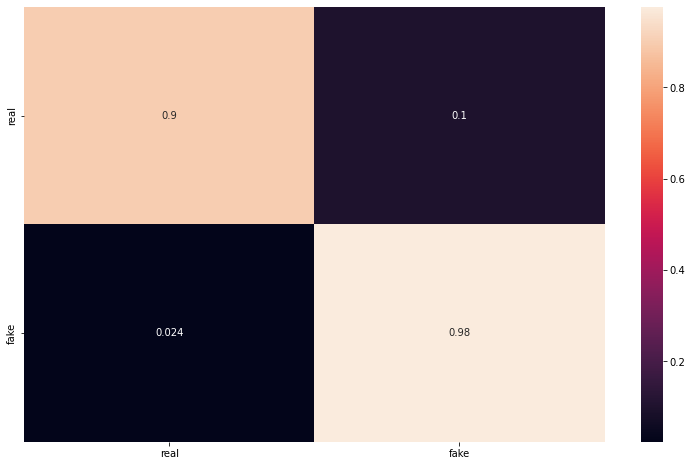

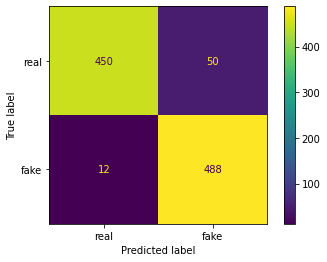

In [ ]:
face_metrics.plot_confusion_matrix()

### Per Source Performance

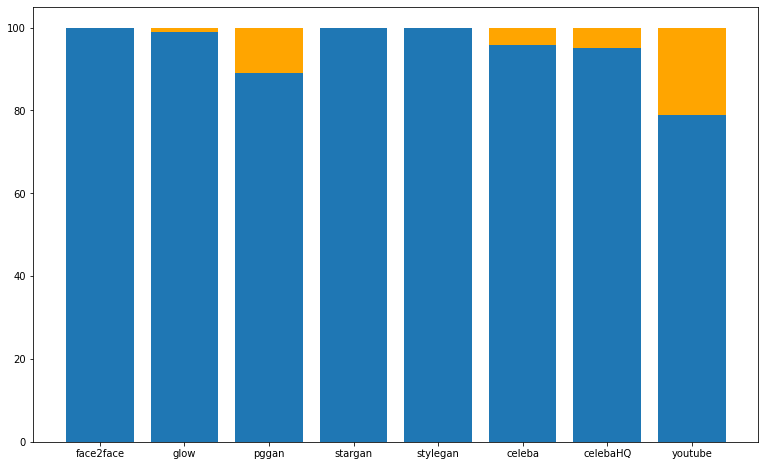

In [ ]:
face_metrics.plot_per_source()

## MLP

### Metrics

In [ ]:
mlp_metrics.print_metrics()

accuracy: 0.561
recall: 0.561
precision: 0.602
f1: 0.512


### Confusion Matrix

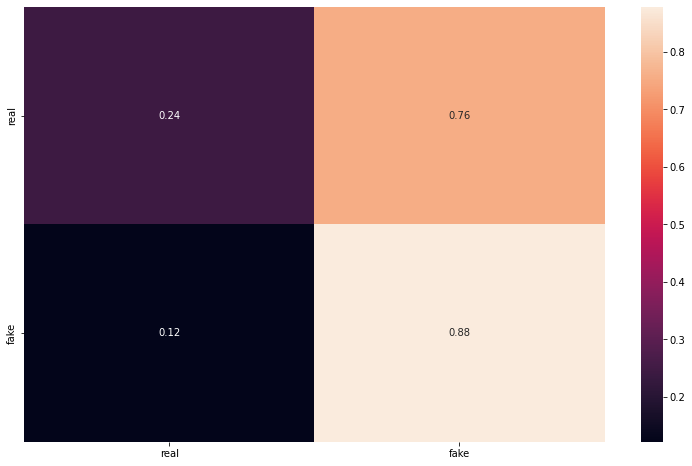

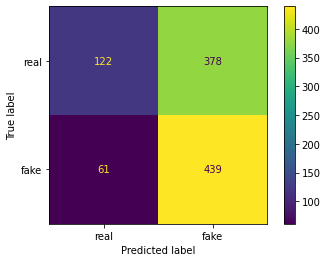

In [ ]:
mlp_metrics.plot_confusion_matrix()

### Per Source Performance

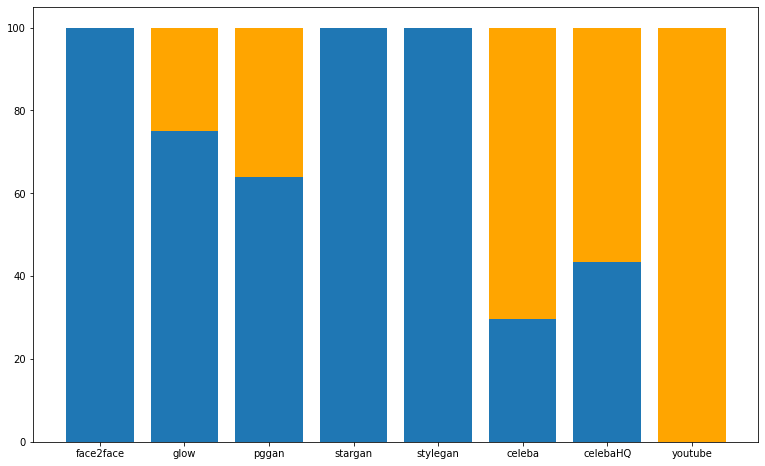

In [ ]:
mlp_metrics.plot_per_source()

## SoftmaxClassifier

### Metrics

In [ ]:
sc_metrics.print_metrics()

accuracy: 0.518
recall: 0.518
precision: 0.582
f1: 0.401


### Confusion Matrix

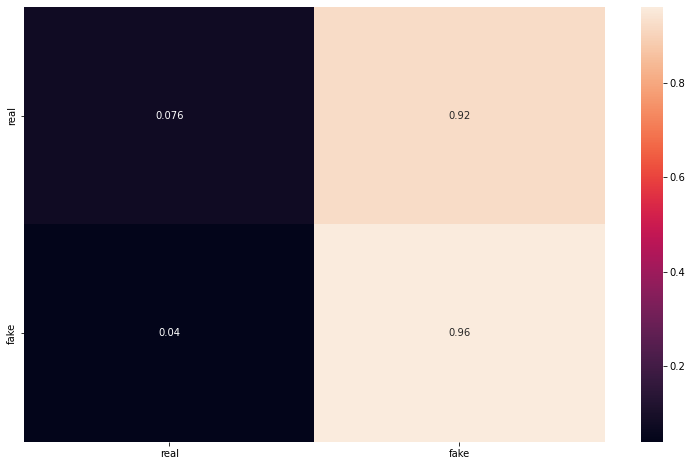

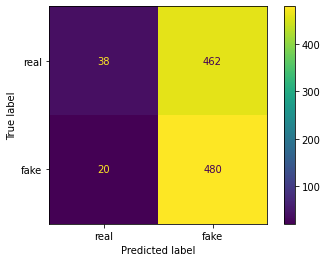

In [ ]:
sc_metrics.plot_confusion_matrix()

### Per Source Performance

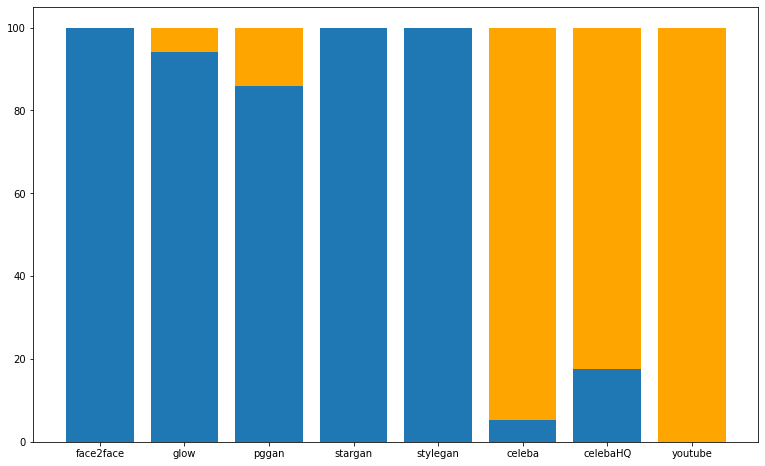

In [ ]:
sc_metrics.plot_per_source()

## FaceCNN vs MLP vs SoftmaxClassifier

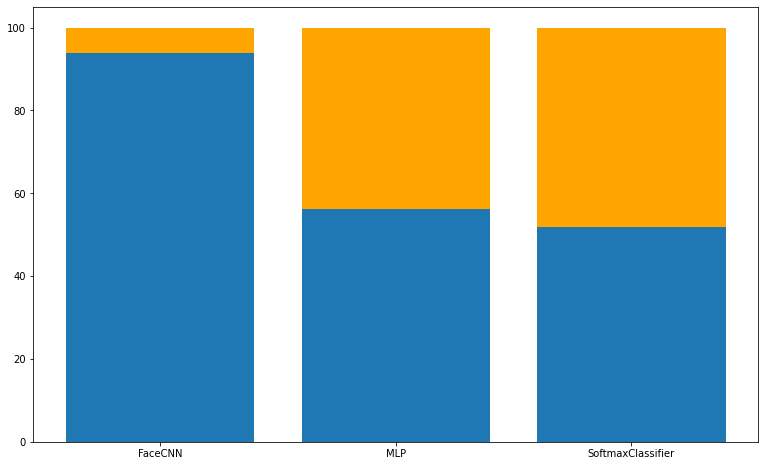

In [ ]:
model_names = ['FaceCNN', 'MLP', 'SoftmaxClassifier']
model_acc_total = [100] * len(model_names)
model_accs = [0, 0, 0]

model_accs[0] = accuracy_score(face_metrics.y_true, face_metrics.y_pred) * 100
model_accs[1] = accuracy_score(mlp_metrics.y_true, mlp_metrics.y_pred) * 100
model_accs[2] = accuracy_score(sc_metrics.y_true, sc_metrics.y_pred) * 100

plt.figure(figsize=(13, 8))
plt.bar(model_names, model_acc_total, color='orange')
plt.bar(model_names, model_accs)
plt.show()

# 3. Plotting the FaceCNN Learning History

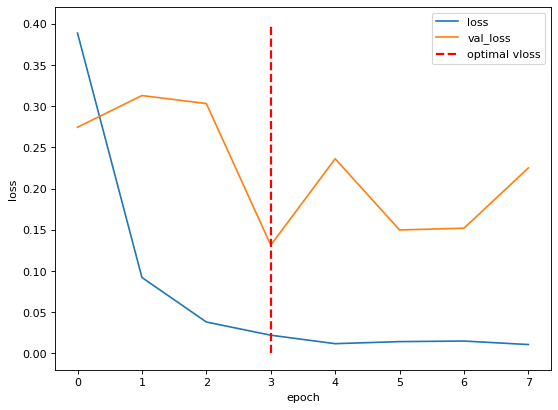

In [ ]:
loss_hist = np.loadtxt('facenet-main/trained/history/FaceCNN_loss.csv', delimiter=',')[:4960]
vloss_hist = np.loadtxt('facenet-main/trained/history/FaceCNN_vloss.csv', delimiter=',')

# calc mean of losses over each epoch + some data cleanups/processings
loss_hist = np.mean(loss_hist.reshape(-1, 620), axis=1).reshape(-1, 1)
vloss_hist = np.mean(vloss_hist.reshape(-1, 19000), axis=1).reshape(-1, 1)
epochs = range(0, len(loss_hist))


# training and validation values histories
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(epochs, loss_hist, '#1f77b4', epochs, vloss_hist, '#ff8010', lw=1.5)

# minimum validation loss point
plt.plot([3, 3], [0, 0.4], 'r--', lw=2)

# draw the figure + miscs
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss', 'optimal vloss'])
plt.show()

# 4. Examples of FaceCNN Classification

In [ ]:
showcase_dataset = FaceDataset(root_dir='facenet-main/data/samples', img_dim=Config.img_dim)
showcase_loader = showcase_dataset.get_data_loader(batch_size=5, use_shuffle=True)

with torch.no_grad():
    images, labels, _ = next(iter(showcase_loader))
    images, labels = images.to(device), labels.to(device)
    out_labels = face_model(images)
    preds = torch.argmax(out_labels.data, dim=1)

images, labels = images.cpu(), labels.cpu()
for img, label, pred in zip(images, labels, preds):
    if pred == label:
        plt.title(f'(correct) {FaceDataset.label_to_str[label]}')
    else:
        plt.title(f'(wrong) {FaceDataset.label_to_str[pred]}', color='red')
    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.show()

# 5. FaceCNN Performance on out of Distribution Images


In [ ]:
# testing the model with images that have never trained for before. It is from a comepletly different dataset that was not part of any of my training/validation/testing datasets.

new_dataset = FaceDataset(root_dir='facenet-main/data/new', img_dim=Config.img_dim)
new_loader = new_dataset.get_data_loader(batch_size=1, use_shuffle=False)
new_metrics = Metrics()

with torch.no_grad():
    for data in new_loader:
        images, labels = data[0].to(device), data[1].to(device)

        out_labels = face_model(images)
        preds = torch.argmax(out_labels.data, dim=1)

        new_metrics.y_pred.extend(preds.data.cpu().numpy())
        new_metrics.y_true.extend(labels.data.cpu().numpy())

### Metrics

In [ ]:
new_metrics.print_metrics()

accuracy: 0.548
recall: 0.548
precision: 0.999
f1: 0.707


### Confusion Matrix

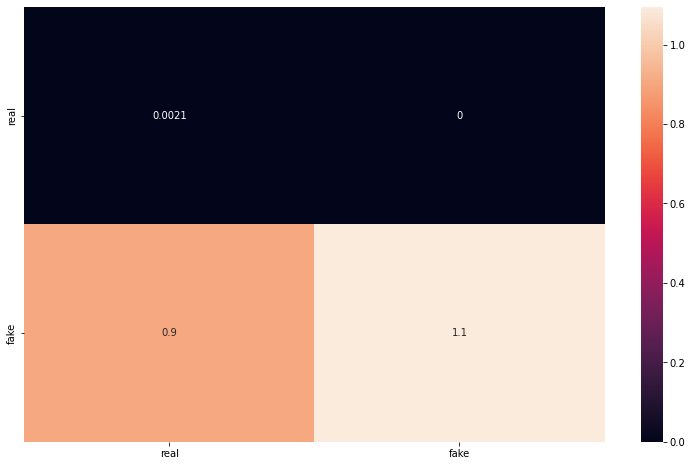

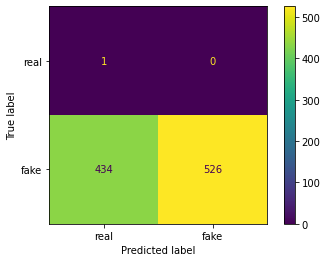

In [ ]:
new_metrics.plot_confusion_matrix()

# 6. Visualizing  FaceCNN's Filters

In [ ]:
# source: COMP6321/lab5-exercises

def plot_matrix_grid(V, title, cmap='bwr'):
    """
    Given an array V containing stacked matrices, plots them in a grid layout.
    V should have shape (K,M,N) where V[k] is a matrix of shape (M,N).
    The default cmap is "bwr" (blue-white-red) but can also be "gray".
    """
    if isinstance(V, torch.Tensor):
        V = V.detach().numpy()
    assert V.ndim == 3, "Expected V to have 3 dimensions, not %d" % V.ndim
    k, m, n = V.shape
    ncol = 8                                     # At most 8 columns
    nrow = min(4, (k + ncol - 1) // ncol)        # At most 4 rows
    V = V[:nrow * ncol]                            # Focus on just the matrices we'll actually plot
    figsize = (2 * ncol, max(1, 2 * nrow * (m / n)))     # Guess a good figure shape based on ncol, nrow
    fig, axes = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=figsize)
    fig.suptitle(title)
    vmax = np.percentile(np.abs(V), [99.9])      # Show the main range of values, between 0.1%-99.9%
    for v, ax in zip(V, axes.flat):
        img = ax.matshow(v, vmin=-vmax, vmax=vmax, cmap=plt.get_cmap(cmap))
        ax.set_xticks([])
        ax.set_yticks([])
    for ax in axes.flat[len(V):]:
        ax.set_axis_off()
    fig.colorbar(img, cax=fig.add_axes([0.92, 0.25, 0.01, .5]))   # Add a colorbar on the right

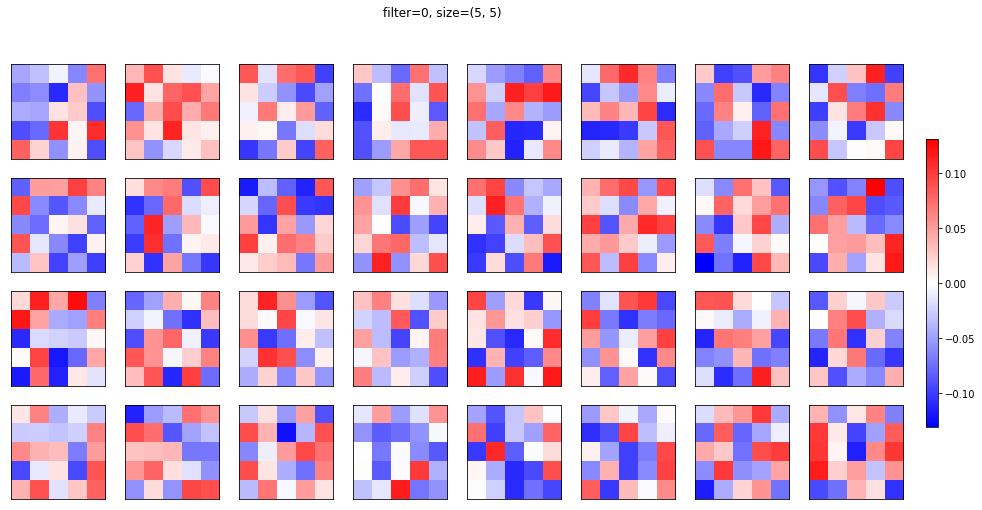

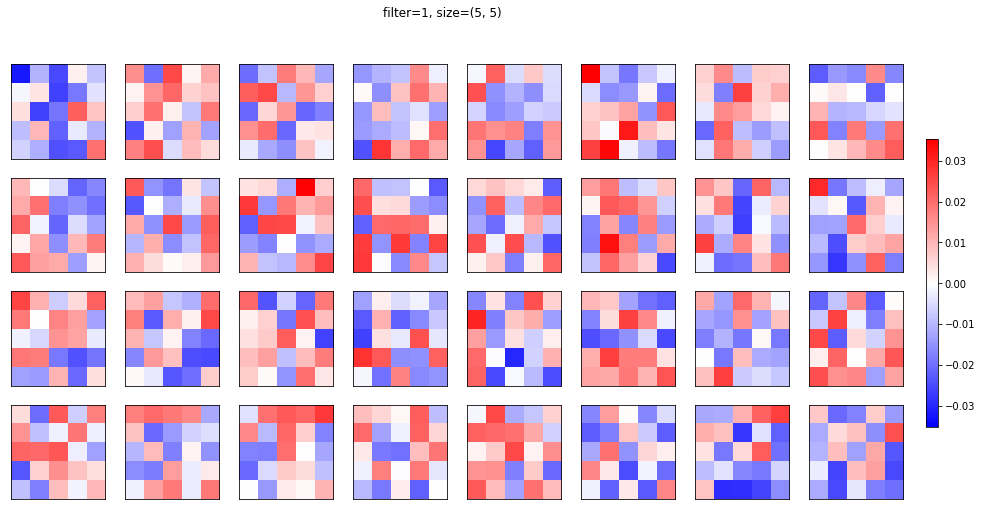

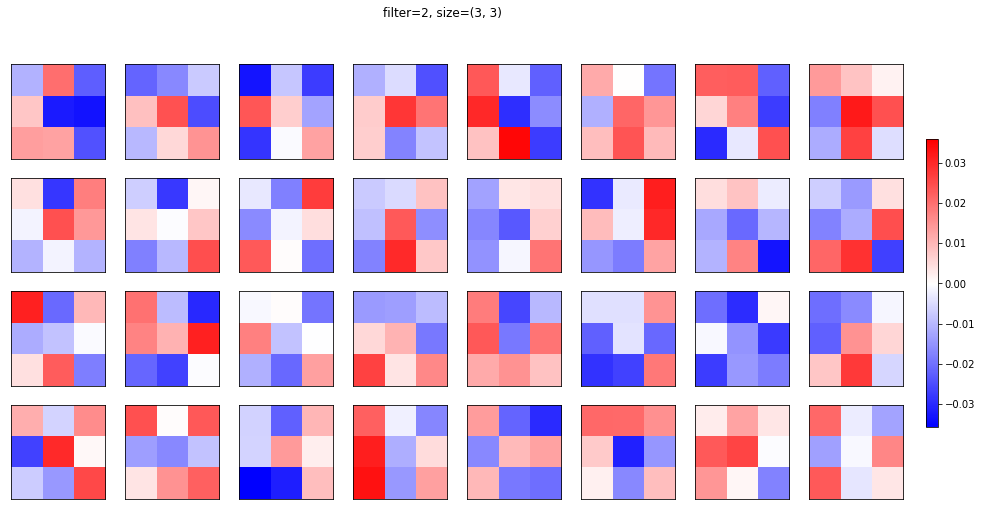

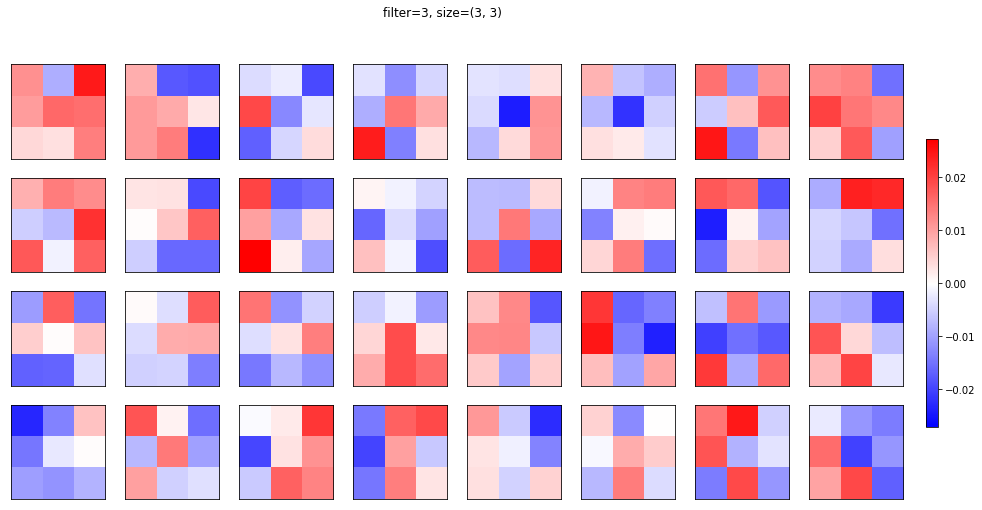

In [ ]:
filter_indices = [0, 4, 8, 12]
filter_size = {0: 5, 4: 5, 8: 3, 12: 3}
params = copy.deepcopy(face_model).cpu().parameters()

for idx, W in enumerate(params):
    if idx in filter_indices:
        title = f'filter={idx//4}, size=({filter_size[idx]}, {filter_size[idx]})'
        plot_matrix_grid(W.reshape(-1, filter_size[idx], filter_size[idx]), title)